# La prédiction des prix des actions RNN
## NOM: AMAGOUR Meriem




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

### Chargement des données d'entraînement


In [3]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values


### Normalisation des données d'entraînement


In [4]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)


### Préparation des données d'entraînement


In [5]:
X_train = []
y_train = []
for i in range(90, 2035):
    X_train.append(training_set_scaled[i-90:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Initialisation et compilation du modèle RNN


In [6]:
model = Sequential()


In [7]:
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


/Users/meriemamagour/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [9]:
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))


In [10]:
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

In [11]:
model.add(Dense(units=1))


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')


# Entraînement du modèle

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.5565
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.2391
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.1470
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0983
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0712
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0523
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0385
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0302
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0245
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0177


### Chargement des données de test


In [14]:
url_test = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url_test)
real_stock_price = dataset_test.iloc[:, 1:2].values


### Préparation des données de test


In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(90, 106):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Prédiction des prix


In [16]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


### Visualisation des résultats


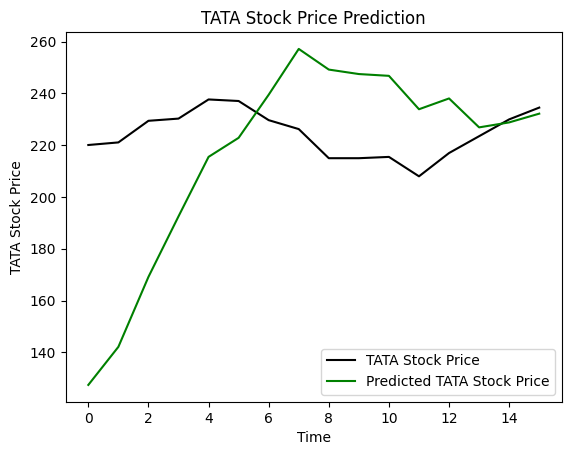

In [17]:
plt.plot(real_stock_price, color='black', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()